<a href="https://colab.research.google.com/github/anjujayapal/NOAA-Data-Analysis/blob/main/NOAA_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOAA-DATA-ANALYSIS 2005-2015**

1. Familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.





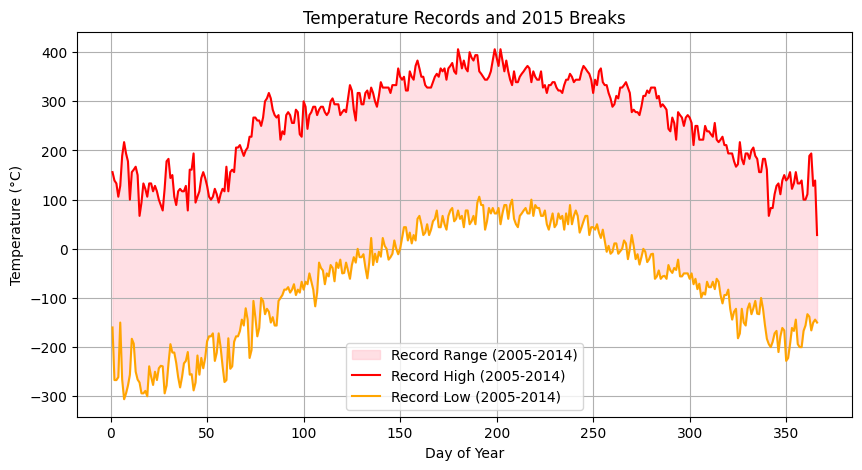

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/drive/MyDrive/Projects/NOAA-Data-Analysis/temperature (1).csv')

# Convert Date column to Datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for 2005-2014 and 2015
df_2005_2014 = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)].copy()
df_2015 = df[df['Date'].dt.year == 2015].copy()

# Extract day of year
df_2005_2014['dayofyear'] = df_2005_2014['Date'].dt.dayofyear
df_2015['dayofyear'] = df_2015['Date'].dt.dayofyear


# Calculate record highs and lows
record_highs = df_2005_2014.groupby('dayofyear')['Data_Value'].max()
record_lows = df_2005_2014.groupby('dayofyear')['Data_Value'].min()

# Plot the record highs and lows
plt.figure(figsize=(10, 5))
plt.fill_between(record_highs.index, record_lows, record_highs, color='pink', alpha=0.5, label='Record Range (2005-2014)')
plt.plot(record_highs, label='Record High (2005-2014)', color='red')
plt.plot(record_lows, label='Record Low (2005-2014)', color='orange')

# Labels and legend
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Records and 2015 Breaks')
plt.legend()
plt.grid(True)
plt.show()

* Data Preprocessing: Convert the Date column to a datetime object and extract the day of the year.
* Filtering: The data is filtered for the period 2005-2014.
* Grouping and Aggregation: Calculate the maximum and minimum temperatures for each day of the year.
* Plotting: The line graph is plotted with a shaded area between record highs and lows.


**2.** Overlay a scatter of the 2015 data for any points
(highs and lows) for which the ten year record (2005-2014)
record high or record low was broken in 2015.

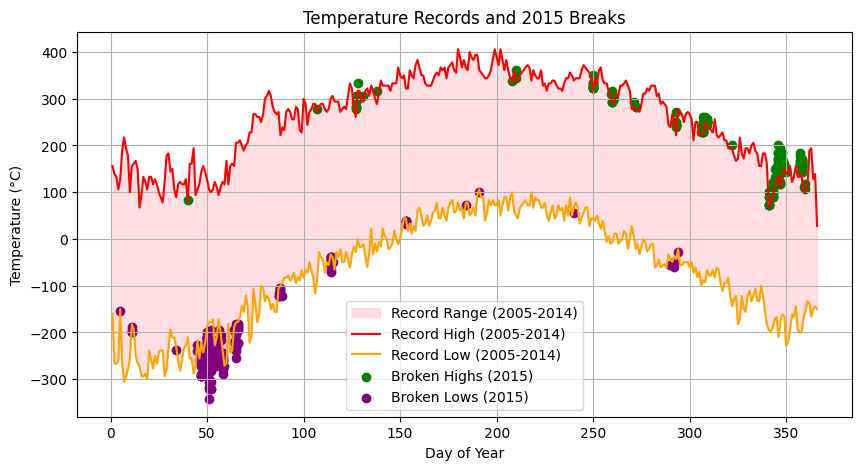

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/drive/MyDrive/Projects/NOAA-Data-Analysis/temperature (1).csv')

# Convert Date column to Datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for 2005-2014 and 2015
df_2005_2014 = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)].copy()
df_2015 = df[df['Date'].dt.year == 2015].copy()

# Extract day of year
df_2005_2014['dayofyear'] = df_2005_2014['Date'].dt.dayofyear
df_2015['dayofyear'] = df_2015['Date'].dt.dayofyear

# Calculate record highs and lows
record_highs = df_2005_2014.groupby('dayofyear')['Data_Value'].max()
record_lows = df_2005_2014.groupby('dayofyear')['Data_Value'].min()

# Identify 2015 records that broke the 2005-2014 records
broken_highs = df_2015[df_2015['Data_Value'] > df_2015['dayofyear'].map(record_highs)]
broken_lows = df_2015[df_2015['Data_Value'] < df_2015['dayofyear'].map(record_lows)]

# Plot the record highs and lows
plt.figure(figsize=(10, 5))
plt.fill_between(record_highs.index, record_lows, record_highs, color='pink', alpha=0.5, label='Record Range (2005-2014)')
plt.plot(record_highs, label='Record High (2005-2014)', color='red')
plt.plot(record_lows, label='Record Low (2005-2014)', color='orange')

# Scatter the broken records
plt.scatter(broken_highs['dayofyear'], broken_highs['Data_Value'], color='green', label='Broken Highs (2015)')
plt.scatter(broken_lows['dayofyear'], broken_lows['Data_Value'], color='purple', label='Broken Lows (2015)')

# Labels and legend
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Records and 2015 Breaks')
plt.legend()
plt.grid(True)
plt.show()

**3.** Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.

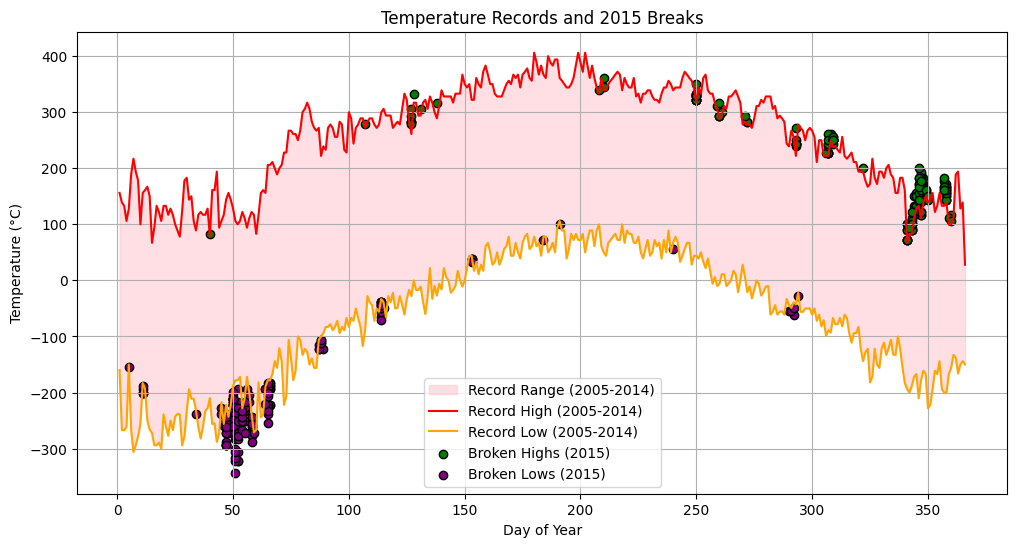

In [28]:
# Remove leap days
df_2005_2014 = df_2005_2014[~((df_2005_2014['Date'].dt.month == 2) & (df_2005_2014['Date'].dt.day == 29))]
df_2015 = df_2015[~((df_2015['Date'].dt.month == 2) & (df_2015['Date'].dt.day == 29))]

# Extract day of year
df_2005_2014['dayofyear'] = df_2005_2014['Date'].dt.dayofyear
df_2015['dayofyear'] = df_2015['Date'].dt.dayofyear

# Calculate record highs and lows
record_highs = df_2005_2014.groupby('dayofyear')['Data_Value'].max()
record_lows = df_2005_2014.groupby('dayofyear')['Data_Value'].min()

# Identify 2015 records that broke the 2005-2014 records
broken_highs = df_2015[df_2015['Data_Value'] > df_2015['dayofyear'].map(record_highs)]
broken_lows = df_2015[df_2015['Data_Value'] < df_2015['dayofyear'].map(record_lows)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot the record highs and lows
plt.fill_between(record_highs.index, record_lows, record_highs, color='pink', alpha=0.5, label='Record Range (2005-2014)')
plt.plot(record_highs, label='Record High (2005-2014)', color='red')
plt.plot(record_lows, label='Record Low (2005-2014)', color='orange')

# Scatter the broken records
plt.scatter(broken_highs['dayofyear'], broken_highs['Data_Value'], color='green', label='Broken Highs (2015)', edgecolor='black')
plt.scatter(broken_lows['dayofyear'], broken_lows['Data_Value'], color='purple', label='Broken Lows (2015)', edgecolor='black')

# Labels and legend
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Records and 2015 Breaks')
plt.legend()
plt.grid(True)
plt.show()

**4.** Consider issues such as legends, labels, and chart junk.

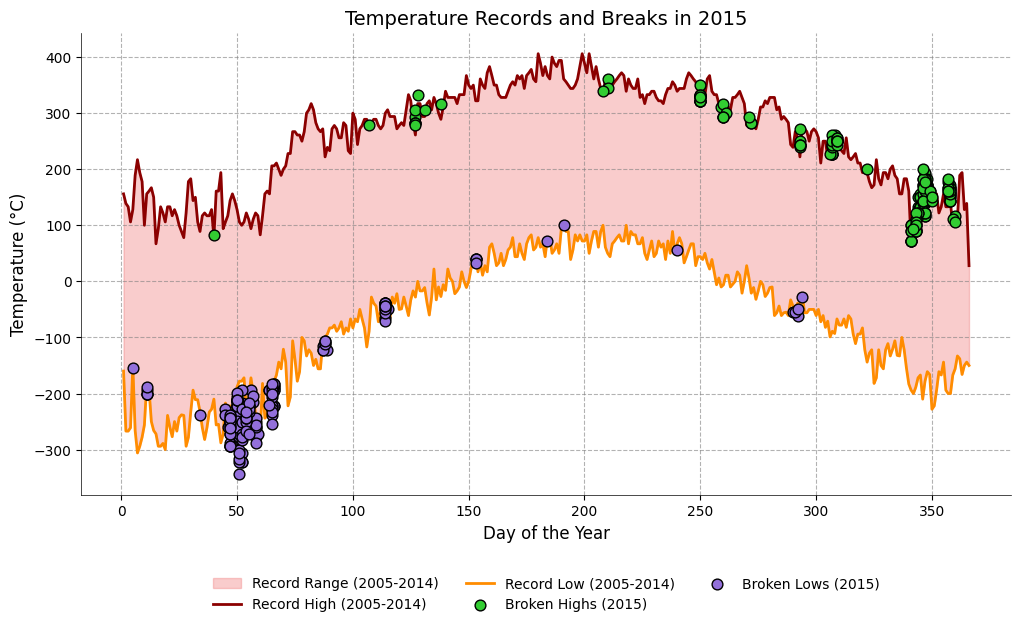

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/Projects/NOAA-Data-Analysis/temperature (1).csv')

# Convert Date column to Datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for 2005-2014 and 2015
df_2005_2014 = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)].copy()
df_2015 = df[df['Date'].dt.year == 2015].copy()

# Remove leap days
df_2005_2014 = df_2005_2014[~((df_2005_2014['Date'].dt.month == 2) & (df_2005_2014['Date'].dt.day == 29))]
df_2015 = df_2015[~((df_2015['Date'].dt.month == 2) & (df_2015['Date'].dt.day == 29))]

# Extract day of year
df_2005_2014['dayofyear'] = df_2005_2014['Date'].dt.dayofyear
df_2015['dayofyear'] = df_2015['Date'].dt.dayofyear

# Calculate record highs and lows
record_highs = df_2005_2014.groupby('dayofyear')['Data_Value'].max()
record_lows = df_2005_2014.groupby('dayofyear')['Data_Value'].min()

# Identify 2015 records that broke the 2005-2014 records
broken_highs = df_2015[df_2015['Data_Value'] > df_2015['dayofyear'].map(record_highs)]
broken_lows = df_2015[df_2015['Data_Value'] < df_2015['dayofyear'].map(record_lows)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot the record highs and lows
plt.fill_between(record_highs.index, record_lows, record_highs, color='lightcoral', alpha=0.4, label='Record Range (2005-2014)')
plt.plot(record_highs, color='darkred', linestyle='-', linewidth=2, label='Record High (2005-2014)')
plt.plot(record_lows, color='darkorange', linestyle='-', linewidth=2, label='Record Low (2005-2014)')

# Scatter the broken records
plt.scatter(broken_highs['dayofyear'], broken_highs['Data_Value'], color='limegreen', edgecolor='black', zorder=5, s=60, label='Broken Highs (2015)')
plt.scatter(broken_lows['dayofyear'], broken_lows['Data_Value'], color='mediumpurple', edgecolor='black', zorder=5, s=60, label='Broken Lows (2015)')

# Enhanced Labels and Title
plt.xlabel('Day of the Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Temperature Records and Breaks in 2015', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)  # Legend without frame for cleaner look

# Minimized Chart Junk
plt.grid(True, linestyle='--', color='gray', alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

plt.show()




1.  Clear Legends:
*   Used distinct colors and labels for record highs, lows, and broken records.
*   Applied a legend without a frame for a cleaner look.

2.  Enhanced Labels:
*   Used clear and descriptive axis labels and a title with appropriate font sizes for better readability.

3.  Minimized Chart Junk:
* Simplified grid lines to dashed and light gray for less distraction.
* Removed top and right spines for a cleaner visual.
* Adjusted the width of remaining spines to be thinner for a more refined appearance.



**5.** The data you have been given is near **Ann Arbor, Michigan, United States**, and visualize on map the stations the data.

In [42]:
# Install required library
!pip install folium

In [48]:
import pandas as pd
import folium

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Projects/NOAA-Data-Analysis/BinSize (1).csv')

df['Lat'] = df['LATITUDE']
df['Lon'] = df['LONGITUDE']

# Filter on data near Ann Arbor, Michigan
ann_arbor_coords = (42.2808, -83.7430)  # Latitude and Longitude for Ann Arbor
radius = 50  # Radius in km for nearby stations

# Create a folium map centered around Ann Arbor
map = folium.Map(location=ann_arbor_coords, zoom_start=10)

# Plot weather stations
for _, row in df.iterrows():
    folium.Marker(
        location=(row['Lat'], row['Lon']),
        popup=f"Station ID: {row['ID']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Save the map to an HTML file
map.save('weather_stations_ann_arbor.html')
